---

# <center>★ AI / ML Research Implementation - LeNet 5 ★

<center><img src="https://raw.githubusercontent.com/Masterx-AI/LeNet-5-Implementation/main/alexnet.png" style="width: 800px;"/>

---

### Objective:
- Understand the Model Architecture
- Reconstruct the Model Architecture from scratch
- Perform a dry run test to assess it's implemenation on real-time data.

---

### LeNet-5 Model Description:

LeNet-5 CNN architecture is made up of 7 layers. The layer composition consists of 
* 3 convolutional layers
* 2 subsampling layers
* 2 fully connected layers.

The first layer is the input layer — this is generally not considered a layer of the network as nothing is learnt in this layer. The input layer is built to take in 32x32, and these are the dimensions of images that are passed into the next layer. Those who are familiar with the MNIST dataset will be aware that the MNIST dataset images have the dimensions 28x28. To get the MNIST images dimension to the meet the requirements of the input layer, the 28x28 images are padded.

The grayscale images used in the research paper had their pixel values normalized from 0 to 255, to values between -0.1 and 1.175. The reason for normalization is to ensure that the batch of images have a mean of 0 and a standard deviation of 1, the benefits of this is seen in the reduction in the amount of training time. In the image classification with LeNet-5 example below, we’ll be normalizing the pixel values of the images to take on values between 0 to 1.

The LeNet-5 architecture utilizes two significant types of layer construct: convolutional layers and subsampling layers.

Convolutional layers
Sub-sampling layers
Within the research paper and the image below, convolutional layers are identified with the ‘Cx’, and subsampling layers are identified with ‘Sx’, where ‘x’ is the sequential position of the layer within the architecture. ‘Fx’ is used to identify fully connected layers. This method of layer identification can be seen in the image above.

The official first layer convolutional layer C1 produces as output 6 feature maps, and has a kernel size of 5x5. The kernel/filter is the name given to the window that contains the weight values that are utilized during the convolution of the weight values with the input values. 5x5 is also indicative of the local receptive field size each unit or neuron within a convolutional layer. The dimensions of the six feature maps the first convolution layer produces are 28x28.

A subsampling layer ‘S2’ follows the ‘C1’ layer’. The ‘S2’ layer halves the dimension of the feature maps it receives from the previous layer; this is known commonly as downsampling.

The ‘S2’ layer also produces 6 feature maps, each one corresponding to the feature maps passed as input from the previous layer. This link contains more information on subsampling layers.

More information on the rest of the LeNet-5 layers is covered in the implementation section.


---

## <center> Stractegic Plan of Action:
    
**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Dataset Prepration
2. Model Development
3. Model Testing
4. Project Outcomes & Conclusion

---

## <center> 1. Dataset Prepration

In [1]:
#Importing the basic librarires

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Preparing the dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

# Preparing the dataset
train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

val_x = train_x[:5000]
val_y = train_y[:5000]

11501568/11490434 [==============================] - 0s 0us/step


2022-06-25 17:20:30.540496: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


---

## <center>2. Model Development

In [2]:
# Building the LeNet Model Architecture

model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

# Compiling the Model
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Checking Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

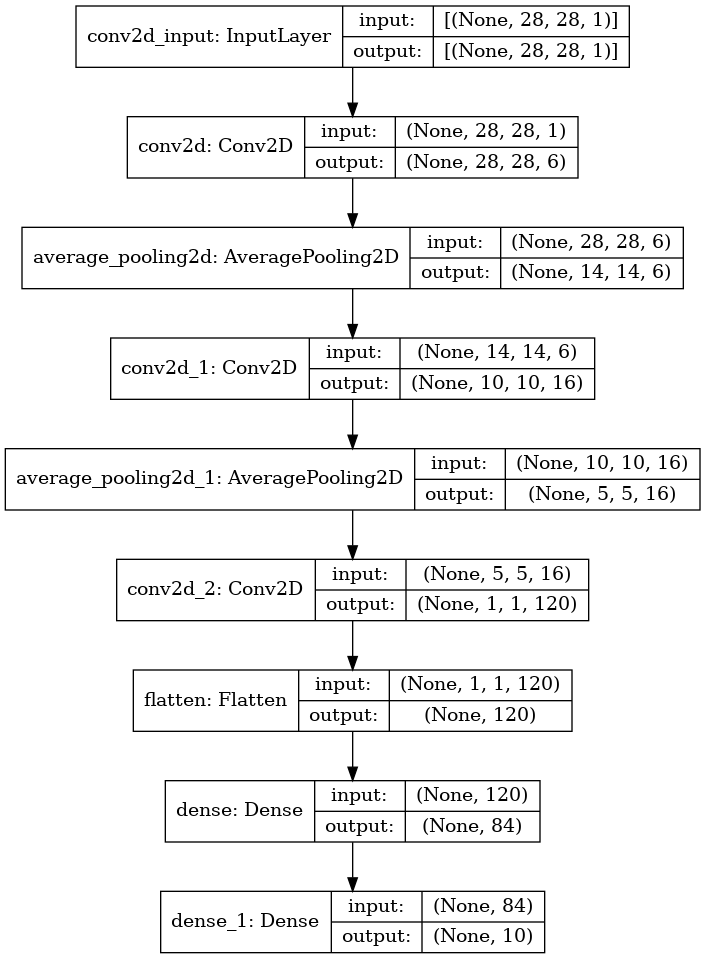

In [3]:
# Plotting the model architecture

keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

---

## <center>3. Model Testing

In [4]:
# Moddel Training

hisroty = model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

2022-06-25 17:20:32.600231: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2263 - accuracy: 0.9316 - val_loss: 0.0780 - val_accuracy: 0.9776
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0833 - accuracy: 0.9744 - val_loss: 0.0508 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0393 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0277 - val_accuracy: 0.9932
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0260 - val_accuracy: 0.9930


In [5]:
# Model Evaluation

model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0449 - accuracy: 0.9858


[0.044896941632032394, 0.98580002784729]

---

# <center>4. Project Outcomes & Conclusion

### Here are some of the key outcomes of the project:

- The Model Architecture was reconstructed from scratch with no errors.
- We were able to plot the model graph & observe input & output shapes of all the layers. 
- Also we could identify that the total trainable paramters for the LeNet-5 model were 61.7k.
- To demonstrate it's functionality, we have tested the model for just 5 epochs (due to hardware limitations). 
- Despite this, the model has performed surpisingly well achieving an accuracy of 98% within few iterations.

In [6]:
#<<<--------------------------------------THE END---------------------------------------->>>